In [40]:
# Import necessary libraries
#pip install pandas
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn style for better visuals
sns.set(style="whitegrid")


# Data Understanding and Preprocessing

## Get Data From .txt files

In [41]:
file_path = 'Product_Explanations.txt'

# Initialize lists to store the parsed data
product_ids = []
descriptions = []

with open('Product_Explanation.txt', 'r') as file:
    for line in file:  # Adjust the range to read more lines if needed
        #print(line)
        product_id, description = line.strip().split(';', 1)
        #print(product_id ,"+", description)
        product_ids.append(product_id)
        descriptions.append(description)
print(len(product_ids))
# Open and read the file

1800


In [109]:
file_path = 'Product_Categories.txt'

# Initialize lists to store the parsed data
categories = []
turkish_lower_mapping = str.maketrans('İI', 'ii')

with open(file_path, 'r') as file:
    for line in file:  # Adjust the range to read more lines if needed
        #print(line)
        _, category = line.strip().split(';', 1)
        category = category.strip()
        if '>' in category:
            category, _ = category.split('>', 1)
        #print(category)
        category=category.lower().translate(turkish_lower_mapping) #lower with turkhish chars
        category = category.strip() #to remove empty char
        categories.append(category)
        
print(len(categories))

1800


In [107]:
#find unique categories

# remove empty and null category
filtered_categories = [category for category in categories if category != '' and category != 'null']

unique_categories = list(set(filtered_categories))
print(len(unique_categories))

239


In [67]:
print(unique_categories[91])
print(unique_categories[120])

print(unique_categories[91] == unique_categories[120])

print("length of 91: ",len(unique_categories[91]))
print("length of 120: ",len(unique_categories[120]))

print(unique_categories[91].strip() == unique_categories[120].strip())



ipod
ipod 
False
length of 91:  4
length of 120:  5
True


I realize that there are some classes that are same but nonvisible char.
I remove it with .strip() function.

It removes decrease the num of categories by about 20 

# Analyze the dataset 

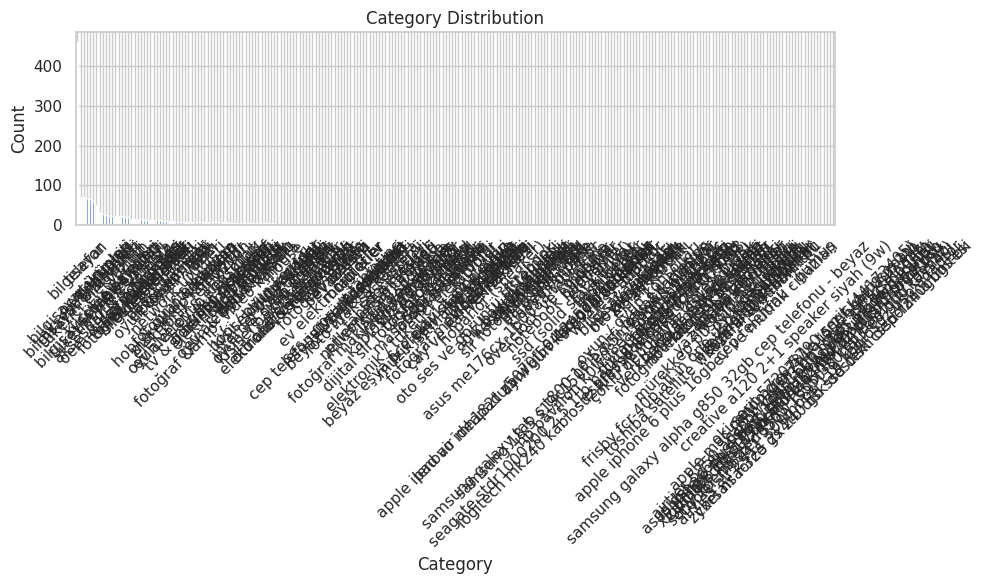

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = 'Product_Explanations.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# Assuming 'Categories' are categorical data, you can plot a bar chart to visualize their distribution
category_counts = data['Categories'].value_counts()
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [114]:
from tabulate import tabulate

# Printing all categories and their counts in descending order in a table format
headers = ['Category', 'Count']
table_data = [(category, count) for category, count in category_counts_sorted.items()]
table = tabulate(table_data, headers=headers, tablefmt='pretty')
print("Categories and their counts in descending order:")
print(table)

Categories and their counts in descending order:
+-------------------------------------------------------+-------+
|                       Category                        | Count |
+-------------------------------------------------------+-------+
|                      bilgisayar                       |  462  |
|                  bilgisayar ürünleri                  |  71   |
|                bilgisayar bileşenleri                 |  70   |
|                   aksesuar ürünleri                   |  66   |
|                        telefon                        |  64   |
|                 tüketici elektroniği                  |  61   |
|                     oem ürünleri                      |  50   |
|               bilgisayar tablet yazıcı                |  32   |
|                      bi̇lgi̇sayar                       |  26   |
|                      elektronik                       |  24   |
|                    çevre birimleri                    |  24   |
|                 aksesua

As we can see in the table and graph above, our dataset is unbalanced. 
So we cannot train a model for classification drictly. 
We need to handle it.

## Create CSV file

In [99]:
file_path = 'unique_categories.txt'

# save unique categories to the file
with open(file_path, 'w') as file:
    for category in unique_categories:
        file.write(category + '\n')

In [110]:
len(categories)


1800

In [111]:

# Create a DataFrame from the parsed data
data = pd.DataFrame({'ID': product_ids, 'Categories':categories ,'Description': descriptions})

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(data.head())

# Save the DataFrame to a CSV file
data.to_csv('Product_Explanations.csv', index=False, encoding='utf-8')


First few rows of the DataFrame:
     ID       Categories                                        Description
0   116          telekom                                               null
1   462       bilgisayar  HP Pavilion 11-n000nt Pentium N3540 4GB 750GB ...
2  1286  cep telefonları  STOKTAN AYNI GÜN TESLİM AYNI GÜN KARGO iPhone ...
3  1290  cep telefonları  Ağırlık (Gr.) 115 Boyut (mm.) 132.4 x 65.5 x 6...
4  1300   ev elektroniği  ÖZELLİKLER Ekran Ekran Boyutu 48" Ekran Boyutu...


Okey, Now we have merged category data and explanation data for products and save them into csv file.

In [82]:
for i in unique_categories:
    print(i)

kablosuz router & ap
isıtma & soğutma
canon crg-731c toner kartuş mavi
foto&kamera
mürekkep kartuşları
lenovo i̇deapad z5070 59 424576 notebook
ütü
diğer sağlık ürünleri
foto & kamera
çevre birimler
anakart
fotoğraf & kamera
soğutucu(fan)
kulaklık
mouse
müzik seti - mp3 - radyo
notebook bi̇lgi̇sayar
telefonlar
müzik çalar
apple ipad air mh182tu/a wi-fi 64gb gold tablet pc
oyun dünyası
network / ağ ürünleri̇
dijital yaşam
elektronik / tüketici elektroniği
frisby fcr-40p all in one usb kart okuyucu
dijital fotoğraf makinesi
oyun / oyun konsolları
veri depolama yedekleme
bilgisayar
bilgisayarlar
fotoğraf makinesi ve kamera
tüketim malzemeleri
bellek (ram)
yazılım ürünleri
fotoğraf / elektronik
toner kartuş şerit
araba ve motor
oto ses görüntü
aksesuar
masaüstü pc
uydu alıcı
aynı gün kargoya verilenler
oyun ve oyun konsolları
corsair force gs 240 gb ssd disk cssd-f240gbgs-bk
oyun ve oyun konsolu
seagate stdr1000200 2.5 1tb backup plus usb 3.0 siyah
canon crg-731m toner kartuş kırmızı
yazıl

In [85]:
from snowballstemmer import TurkishStemmer
from nltk.stem.snowball import SnowballStemmer

# Sample categories
df = [
    "cep telefonu"
,"mac"
,"philips 18.5 193v5lsb2-62 led monitör 5ms siyah"
,"creative a120 2+1 speaker siyah (9w)"
,"monitörler"
,"klavye / mouse"
,"ekran karti"
,"ekran kartı"
,"isıtma soğutma"
,"ev aletleri & yaşam"
,"ev tekstili"
,"hesap makineleri"
,"bilgisayar"
,"bilgisayar bileşenleri"
,"bilgisayarlar"
]

turkStem = TurkishStemmer()
data_words_nostops = [turkStem.stemWord(word) for word in df]
print(data_words_nostops)



['cep telefo', 'mac', 'philips 18.5 193v5lsb2-62 led monitör 5ms siyah', 'creative a120 2+1 speaker siyah (9w)', 'monitör', 'klavye / mou', 'ekran kar', 'ekran kar', 'isıtma soğutma', 'ev aletleri & yaşa', 'ev tekstil', 'hesap makine', 'bilgisayar', 'bilgisayar bileşen', 'bilgisayar']
